In [8]:
# Import necessary pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
# Read and show data
all_alerts_data = pd.read_csv('C:/Users/MSI PC/Downloads/aggregate_alerts_Kota Depok.csv', sep=";")
alerts_data = all_alerts_data.copy()
alerts_data

,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date,Longitude,Latitude
0,5931593,00:00:00,3276,KOTA DEPOK,Dewi Sartika,ROAD_CLOSED,"[106.81841149999966, -6.399794999999999]",240,06/07/2022,1068184115,-6399795
1,5931594,00:00:00,3276,KOTA DEPOK,Krukut Raya,WEATHERHAZARD,"[106.79100399999993, -6.363434999999996]",60,06/07/2022,106791004,-6363435
2,5931595,00:00:00,3276,KOTA DEPOK,NaN,JAM,"[106.783179, -6.443203999999998]",22,06/07/2022,106783179,-6443204
3,5931597,01:00:00,3276,KOTA DEPOK,Krukut Raya,WEATHERHAZARD,"[106.79100399999993, -6.363434999999996]",61,06/07/2022,106791004,-6363435
4,5931596,01:00:00,3276,KOTA DEPOK,Dewi Sartika,ROAD_CLOSED,"[106.81841149999966, -6.399794999999998]",244,06/07/2022,1068184115,-6399795
...,...,...,...,...,...,...,...,...,...,...,...
18035,6217604,23:00:00,3276,KOTA DEPOK,Sawangan Raya,WEATHERHAZARD,"[106.79585200000001, -6.394734]",3,04/09/2022,106795852,-6394734
18036,6217605,23:00:00,3276,KOTA DEPOK,Trans Yogi,WEATHERHAZARD,"[106.91356399999997, -6.375448000000003]",31,04/09/2022,106913564,-6375448
18037,6221715,00:00:00,3276,KOTA DEPOK,Dewi Sartika,ROAD_CLOSED,"[106.81841149999966, -6.3997949999999975]",240,06/09/2022,1068184115,-6399795
18038,6221716,00:00:00,3276,KOTA DEPOK,H Muhasin,ACCIDENT,"[106.79168499999999, -6.404493000000001]",12,06/09/2022,106791685,-6404493


In [17]:
# Print the summary statistics of the numerical columns
print(all_alerts_data.describe())

                 id  kemendagri_kabupaten_kode  total_records    Longitude   \
count  1.804000e+04                    18040.0   18040.000000  1.804000e+04   
mean   6.082011e+06                     3276.0      57.487805  3.971339e+08   
std    8.211988e+04                        0.0      70.836164  4.482109e+08   
min    5.931593e+06                     3276.0       1.000000  1.067370e+05   
25%    6.009374e+06                     3276.0      15.000000  1.067908e+08   
50%    6.085594e+06                     3276.0      30.000000  1.068470e+08   
75%    6.153102e+06                     3276.0      60.000000  1.067836e+09   
max    6.221717e+06                     3276.0     723.000000  1.069158e+09   

           Latitude  
count  1.804000e+04  
mean  -1.229895e+09  
std    2.493253e+09  
min   -6.460597e+09  
25%   -6.452472e+06  
50%   -6.396002e+06  
75%   -6.362076e+06  
max   -6.340000e+02  


In [14]:
all_alerts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18040 entries, 0 to 18039
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         18040 non-null  int64 
 1   time                       18040 non-null  object
 2   kemendagri_kabupaten_kode  18040 non-null  int64 
 3   kemendagri_kabupaten_nama  18040 non-null  object
 4   street                     16746 non-null  object
 5   type                       18040 non-null  object
 6   avg_location               18040 non-null  object
 7   total_records              18040 non-null  int64 
 8   date                       18040 non-null  object
 9   Longitude                  18040 non-null  int64 
 10  Latitude                   18040 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.5+ MB


In [16]:
# Print the number of missing values in each column
print(alerts_data.isnull().sum())


id                              0
time                            0
kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                       1294
type                            0
avg_location                    0
total_records                   0
date                            0
Longitude                       0
Latitude                        0
dtype: int64


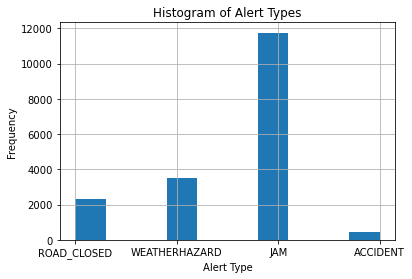

In [19]:

# Plot a histogram of the 'type' column
alerts_data['type'].hist()
plt.title('Histogram of Alert Types')
plt.xlabel('Alert Type')
plt.ylabel('Frequency')
plt.show()



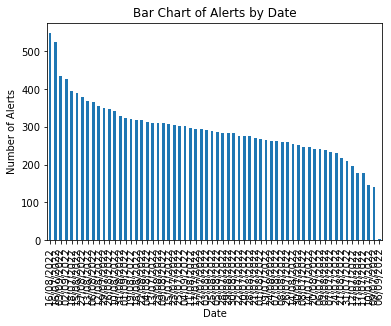

In [22]:
# Plot a bar chart of the number of alerts by date
alerts_data['date'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Alerts by Date')
plt.xlabel('Date')
plt.ylabel('Number of Alerts')
plt.show()

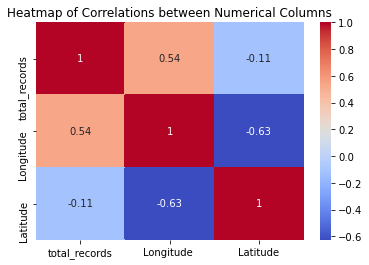

In [25]:
# Plot a boxplot of the 'total_records' column
import seaborn as sns
# Plot a heatmap of the correlations between the numerical columns
corr = alerts_data[['total_records', 'Longitude ', 'Latitude']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between Numerical Columns')
plt.show()

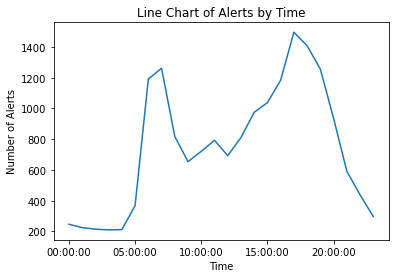

In [27]:
# Plot a line chart of the number of alerts by time
alerts_data.groupby(['time']).size().plot()
plt.title('Line Chart of Alerts by Time')
plt.xlabel('Time')
plt.ylabel('Number of Alerts')
plt.show()

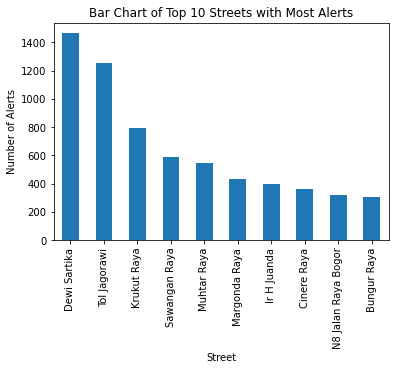

In [30]:
# Plot a bar chart of the number of alerts by street
alerts_data['street'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Bar Chart of Top 10 Streets with Most Alerts')
plt.xlabel('Street')
plt.ylabel('Number of Alerts')
plt.show()

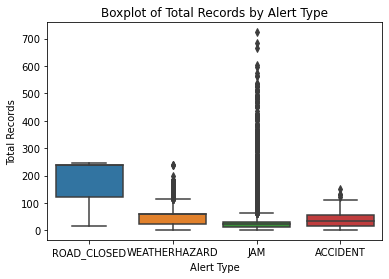

In [31]:
sns.boxplot(x='type', y='total_records', data=alerts_data)
plt.title('Boxplot of Total Records by Alert Type')
plt.xlabel('Alert Type')
plt.ylabel('Total Records')
plt.show()

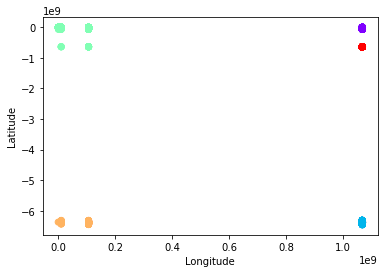

In [3]:
# Extract the relevant columns
X = alerts_data[['Latitude', 'Longitude ']]

# Fit the KMeans model with k = 5
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
alerts_data['cluster'] = labels

# Plot the clusters
plt.scatter(alerts_data['Longitude '], alerts_data['Latitude'], c=alerts_data['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

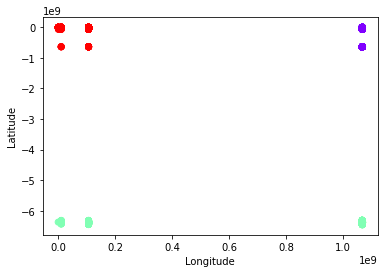

In [88]:
# Extract the relevant columns
X = alerts_data[['Latitude', 'Longitude ']]

# Fit the KMeans model with k = 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
alerts_data['cluster'] = labels

# Plot the clusters
plt.scatter(alerts_data['Longitude '], alerts_data['Latitude'], c=alerts_data['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [91]:
# Print the clustering performance metrics
print('Within-cluster Sum of Squares (WSS):', wss)
print('Silhouette Coefficient:', silhouette)
print('Davies-Bouldin Index:', db)
print('Calinski-Harabasz Index:', ch)

Within-cluster Sum of Squares (WSS): 4.478434843417192e+20
Silhouette Coefficient: 0.9577336973489873
Davies-Bouldin Index: 0.13897702083154453
Calinski-Harabasz Index: 2322109.9898413955


In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'n_clusters': [2, 3, 4, 5, 6]}

# Create a KMeans model
kmeans = KMeans(random_state=0)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)

# Print the best hyperparameters
print(grid_search.best_params_)

{'n_clusters': 6}


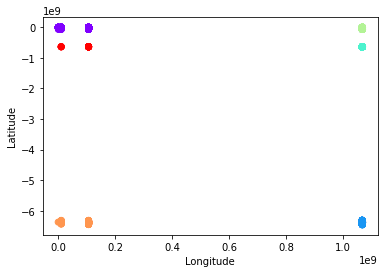

In [7]:
best_kmeans = grid_search.best_estimator_
labels = best_kmeans.labels_

# Add the cluster labels to the DataFrame
alerts_data['cluster'] = labels

# Plot the clusters
plt.scatter(alerts_data['Longitude '], alerts_data['Latitude'], c=alerts_data['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

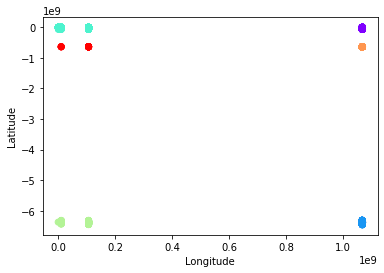

In [95]:
best_kmeans = grid_search.best_estimator_
labels = best_kmeans.labels_

# Add the cluster labels to the DataFrame
alerts_data['cluster'] = labels

# Plot the clusters
plt.scatter(alerts_data['Longitude '], alerts_data['Latitude'], c=alerts_data['cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [99]:
# Add the cluster labels to the DataFrame
alerts_data['cluster'] = labels

# Compute clustering performance metrics
#wss = kmeans.inertia_
silhouette = silhouette_score(X, labels)
db = davies_bouldin_score(X, labels)
ch = calinski_harabasz_score(X, labels)

In [100]:
# Print the clustering performance metrics
#print('Within-cluster Sum of Squares (WSS):', wss)
print('Silhouette Coefficient:', silhouette)
print('Davies-Bouldin Index:', db)
print('Calinski-Harabasz Index:', ch)

Silhouette Coefficient: 0.9720632793265095
Davies-Bouldin Index: 0.05116945307671893
Calinski-Harabasz Index: 31872650.209976584
